In [30]:
#import imp library

from urllib.request import urlopen
from bs4 import BeautifulSoup as soup

In [31]:
#reading url
httpObject = urlopen("https://www.flipkart.com/q/best-laptops-under-rs-50000")
webdata = httpObject.read()
# print(webdata)

In [32]:
#creating soup object
soup_data = soup(webdata,'lxml')
# print(type(soup_data))

In [33]:
#check all functions
# print(dir(soup_data))

In [34]:
containers = soup_data.find_all('div', class_ = '_2kHMtA')
# print(len(containers))

# print(dir(containers))

In [35]:
#first
# print(containers[0])

#Extract Information

In [36]:
data = []

for container in containers:
  product = container.find('div', class_ = '_4rR01T').text.split("-")[0].strip()
  price = float(container.find('div', class_ = '_30jeq3 _1_WHN1').text.strip().split('₹')[1].replace(',',''))
  try:
    star = container.find('div', class_ = '_3LWZlK').text
  except:
    star = 0

  box1 = container.find('span', class_ = '_2_R_DZ')
  try:
    ratings = box1.span.contents[0].text.strip().split()[0].replace(',', '')
    reviews = box1.span.contents[2].text.strip().split()[0].replace(',', '')
  except:
    ratings = 0
    reviews = 0

  box2 = container.find_all('div', class_='fMghEO')
  for i in box2:
    items = i.find_all('li', class_='rgWa7D')
    item_values = [j.text for j in items]

    # Assign separate variables for each item
    processor = item_values[0]
    ram = item_values[1]
    operating_system = item_values[2]
    storage = item_values[3]
    display = item_values[4]
    warranty = item_values[5]


    row_data = {
            'product': product,
            'price':price,
            'star':star,
            'rating':ratings,
            'reviews':reviews,
            'processor':processor,
            'ram': ram,
            'operating_system': operating_system,
            'storage': storage,
            'display': display,
            'warranty': warranty
        }
    data.append(row_data)

In [37]:
import pandas as pd

df = pd.DataFrame(data)
df

,product,price,star,rating,reviews,processor,ram,operating_system,storage,display,warranty
0,MSI Core i5 11th Gen,50990.0,4.3,1033,99,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,2 Year Carry-in Warranty
1,MSI Core i9 13th Gen,489990.0,0,0,0,Intel Core i9 Processor (13th Gen),64 GB DDR5 RAM,Windows 11 Operating System,2 TB SSD,43.94 cm (17.3 Inch) Display,2 Year Carry-in Warranty
2,HP 14s Intel Core i3 11th Gen,35990.0,4.3,3067,261,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty
3,HP 15s Intel Core i3 12th Gen,41990.0,4.3,743,87,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021
4,MSI Core i5 11th Gen,49990.0,4,35,4,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 Inch) Display,2 Year Carry-in Warranty
5,HP Ryzen 5 Hexa Core 5500U,43490.0,4.3,1991,151,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"Microsoft Office Home 2019 & Office 365, HP Do..."
6,HP Ryzen 5 Hexa Core 5500U,48990.0,4.3,726,77,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,"Microsoft Office 2021 Home & Student, HP Docum..."
7,MSI Core i9 13th Gen,599990.0,0,0,0,Intel Core i9 Processor (13th Gen),64 GB DDR5 RAM,Windows 11 Operating System,4 TB SSD,43.94 cm (17.3 Inch) Display,2 Year Carry-in Warranty
8,HP Ryzen 3 Quad Core 5300U,36499.0,4.2,2458,268,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"Microsoft Office 2019 & Office 365, HP Documen..."
9,HP Ryzen 5 Hexa Core 5500U,44490.0,4.3,2506,244,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"Microsoft Office Home & Student 2019, HP Docum..."


#Analysis

In [38]:
df['star'] = df['star'].str.strip()

In [39]:
df['star'] = df['star'].astype(float)

In [40]:
df[df['star'] == df['star'].max()]

,product,price,star,rating,reviews,processor,ram,operating_system,storage,display,warranty
17,HP Victus Intel Core i7 13th Gen,109990.0,4.8,5,2,Intel Core i7 Processor (13th Gen),16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty


In [41]:
df.sort_values(by='star', ascending=False)

,product,price,star,rating,reviews,processor,ram,operating_system,storage,display,warranty
17,HP Victus Intel Core i7 13th Gen,109990.0,4.8,5,2,Intel Core i7 Processor (13th Gen),16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
16,MSI Core i7 11th Gen,63990.0,4.6,24,0,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 Inch) Display,2 Year Carry-in Warranty
12,MSI Ryzen 5 Hexa Core 7530U,45990.0,4.4,111,14,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in Warranty
14,HP Ryzen 5 Hexa Core 5500U,42990.0,4.4,22,1,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
10,Lenovo IdeaPad Ryzen 5 Hexa Core 5500U,47990.0,4.3,2058,214,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021
15,HP Ryzen 5 Hexa Core 5500U,48990.0,4.3,393,29,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,Microsoft Office Home & Student 2021
2,HP 14s Intel Core i3 11th Gen,35990.0,4.3,3067,261,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty
11,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,43500.0,4.3,2058,214,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,93.01 cm (36.62 cm) Display,Office Home and Student 2021
0,MSI Core i5 11th Gen,50990.0,4.3,1033,99,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,2 Year Carry-in Warranty
9,HP Ryzen 5 Hexa Core 5500U,44490.0,4.3,2506,244,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"Microsoft Office Home & Student 2019, HP Docum..."


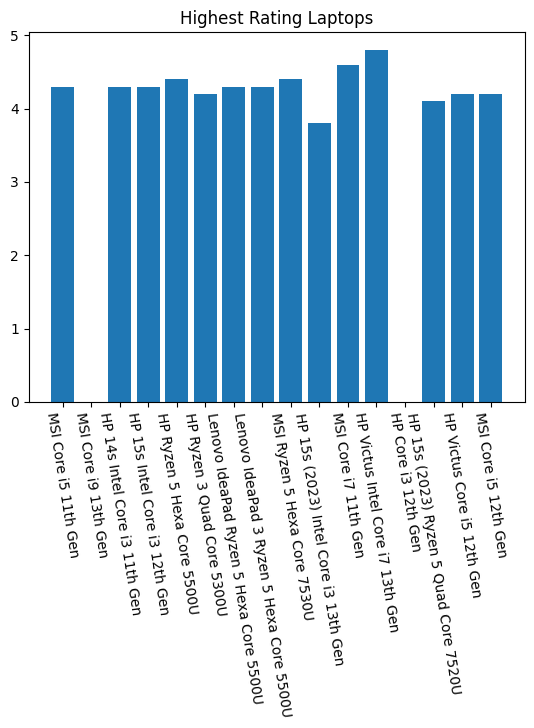

In [54]:
import matplotlib.pyplot as plt

plt.bar(x=df['product'], height=df['star'])
plt.xticks(rotation=279)
plt.title('Highest Rating Laptops')
plt.show()

#Scraping data from all the pages